# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [2]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [3]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [5]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

7.2e-6

#### Wersja ulepszona

In [6]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [8]:
@elapsed better_multiplication(Asmall, Bsmall)

0.0419738

#### Wersja BLASowa

In [9]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [10]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [11]:
@elapsed naive_multiplication(A, B)

5.9350756

In [12]:
@elapsed better_multiplication(A, B)

3.2674696

In [13]:
@elapsed A*B

0.056862

### Wielomiany i aproksymacja średniokwadratowa

In [38]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

    Updating registry at `C:\Users\danie\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [15]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 14 methods)

In [16]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490293 + 2905.5721994684877*x - 1082.7457238744707*x^2 + 100.44658880845455*x^3)

In [17]:
typeof(fit_poly_3)

Polynomial{Float64, :x}

In [18]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534421

In [19]:
Pkg.add("Plots")
using Plots

LoadError: UndefVarError: Pkg not defined

In [20]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

LoadError: UndefVarError: plot not defined

### Wielomiany Czebyszewa w pakiecie Polynomials

In [21]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

In [22]:
plot(t2)

LoadError: UndefVarError: plot not defined

In [23]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [24]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [25]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [26]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [27]:
# using Pkg;
# Pkg.add("TaylorSeries")

In [28]:
using TaylorSeries

LoadError: ArgumentError: Package TaylorSeries not found in current path:
- Run `import Pkg; Pkg.add("TaylorSeries")` to install the TaylorSeries package.


In [29]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

LoadError: UndefVarError: Taylor1 not defined

In [30]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

LoadError: UndefVarError: t not defined

In [31]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

LoadError: UndefVarError: myfun_taylor not defined

In [32]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

LoadError: UndefVarError: myfun_taylor not defined

In [33]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

LoadError: UndefVarError: myfun_taylor not defined

In [34]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

LoadError: UndefVarError: myfun_t_pol not defined

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

3.  Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


# ZAD1

In [39]:
matrix_size = []
operation_type = []
operation_time = []

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "naive_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed naive_multiplication(A,B))
    end
end

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "better_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed better_multiplication(A,B))
    end
end

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "BLAS_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed A*B)
    end
end

In [41]:
using DataFrames
using Statistics

input_data_frame = DataFrame(Matrix_size = matrix_size,
    Operation_type = operation_type, Operation_time = operation_time)
df_grouped=groupby(input_data_frame, [:Operation_type,:Matrix_size])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)


,Operation_type,Matrix_size,Operation_time_mean,Operation_time_std
,Any,Any,Float64,Float64
1,naive_multiplication,10,4.32e-6,1.65382e-6
2,naive_multiplication,20,3.77e-5,2.48158e-5
3,naive_multiplication,30,8.823e-5,1.46804e-5
4,naive_multiplication,40,0.00029798,7.67792e-5
5,naive_multiplication,50,0.00071037,5.46387e-5
6,naive_multiplication,60,0.00122706,8.54525e-5
7,naive_multiplication,70,0.00199915,3.81913e-5
8,naive_multiplication,80,0.00284278,0.000446688
9,naive_multiplication,90,0.00394303,0.00037029


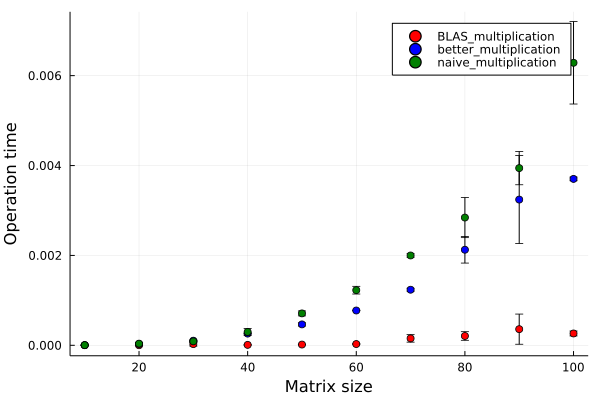

In [42]:
using Plots
scatter(df_combined.Matrix_size, df_combined.Operation_time_mean,
    group=df_combined.Operation_type, yerr=df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time")